## **Track Classification Model**

### Importing required libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
#Mounting your Google Drive
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
base_dir = '/content/drive/My Drive/disease'
train_dir = os.path.join(base_dir, 'train')
validation_dir =os.path.join(base_dir, 'validation')

In [ ]:
print(train_dir)

/content/drive/My Drive/MLandAI/IOT-NCR/track-classification/Track Images/train


In [ ]:
print(validation_dir)

/content/drive/My Drive/MLandAI/IOT-NCR/track-classification/Track Images/validation


In [ ]:
#Path definition of train and validation directories
train_left_dir =os.path.join(train_dir, 'left')  
train_right_dir =os.path.join(train_dir, 'right')
train_straight_dir =os.path.join(train_dir, 'straight')
validation_left_dir =os.path.join(validation_dir, 'left')
validation_right_dir =os.path.join(validation_dir, 'right')
validation_straight_dir = os.path.join(validation_dir, 'straight')

In [ ]:
#Calculate total number of images in the directories
num_left_tr = len(os.listdir(train_left_dir))
num_right_tr = len(os.listdir(train_right_dir))
num_straight_tr = len(os.listdir(train_straight_dir))

num_left_val = len(os.listdir(validation_left_dir))
num_right_val = len(os.listdir(validation_right_dir))
num_straight_val = len(os.listdir(validation_straight_dir))

total_train = num_left_tr + num_right_tr + num_straight_tr
total_val = num_left_val + num_right_val + num_straight_val

In [ ]:
#print number of images
print('total training left images:', num_left_tr)
print('total training right images:', num_right_tr)
print('total training straight images:', num_straight_tr)

print('total validation left images:', num_left_val)
print('total validation right images:', num_right_val)
print('total validation straight images:', num_straight_val)

print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training left images: 56
total training right images: 24
total training straight images: 107
total validation left images: 24
total validation right images: 10
total validation straight images: 46
--
Total training images: 187
Total validation images: 80


### Train, Test and Validation Set Generation

In [ ]:
#Applying transformation to the images
train_image_generator = ImageDataGenerator(rescale=1./255, rotation_range =0) 
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
#Reading train data from directory
train_data_gen =train_image_generator.flow_from_directory(
                                                directory=train_dir, 
                                                shuffle=True, 
                                                target_size=(640,280),
                                                color_mode="grayscale"
                                                )

Found 187 images belonging to 3 classes.


In [ ]:
#Reading validation data from directory
val_data_gen = validation_image_generator.flow_from_directory(                                                              
                                                              color_mode="grayscale",
                                                              directory=validation_dir, 
                                                              target_size=(640,280))

Found 80 images belonging to 3 classes.


In [ ]:
#Function to view the class labels
def classLabel(source=None):
        datagen = ImageDataGenerator(rescale=1. / 255)
        data_generator = datagen.flow_from_directory(
        source)
        class_dictionary = data_generator.class_indices
        return data_generator, class_dictionary

In [ ]:
labels = classLabel(train_dir)
print(labels)

Found 187 images belonging to 3 classes.
(<keras_preprocessing.image.directory_iterator.DirectoryIterator object at 0x7fc4a51d29e8>, {'left': 0, 'right': 1, 'straight': 2})


In [ ]:
sample_training_images, _ = next(train_data_gen) 

### CNN Model building and training

In [ ]:
epochs = 20
batch_size = 15

In [ ]:
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(640,280,1,))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

W0704 10:29:11.912236 140483128248192 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
model.compile(loss= "categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])


In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=10,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch_size)))
)

Epoch 1/10
13/13 [==============================] - 115s 9s/step - loss: 0.3669 - acc: 0.8473 - val_loss: 0.2995 - val_acc: 0.8625
Epoch 2/10
13/13 [==============================] - 4s 284ms/step - loss: 0.0364 - acc: 0.9852 - val_loss: 0.3018 - val_acc: 0.9000
Epoch 3/10
13/13 [==============================] - 4s 281ms/step - loss: 0.0181 - acc: 0.9950 - val_loss: 0.4302 - val_acc: 0.9250
Epoch 4/10
13/13 [==============================] - 4s 276ms/step - loss: 0.0083 - acc: 0.9951 - val_loss: 0.3372 - val_acc: 0.9250
Epoch 5/10
13/13 [==============================] - 4s 271ms/step - loss: 0.0115 - acc: 0.9951 - val_loss: 0.3401 - val_acc: 0.9250
Epoch 6/10
13/13 [==============================] - 4s 292ms/step - loss: 0.0073 - acc: 0.9975 - val_loss: 0.3030 - val_acc: 0.9250
Epoch 7/10
13/13 [==============================] - 4s 280ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.3198 - val_acc: 0.9125
Epoch 8/10
13/13 [==============================] - 4s 286ms/step - loss: 0.0

***Track Classification Model has been trained!***

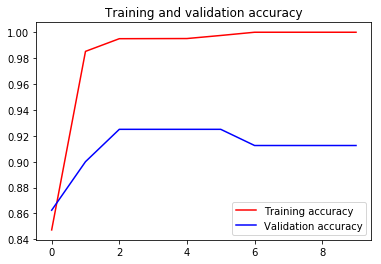

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()